<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/pandas/pandas_drop_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Drop Outliers in Pandas Data

Numerical data that is too many standard deviations away from the mean could be considered an outlier.  Here we show do to delete that.


Here we use the **Z-Score Method** and **Interquartile Range (IQR) Method**

The z-score is:


$$z = \frac{x - \mu}{\sigma}$$

## Two Approaches to Eliminating Outliers

**1. Interquartile Range (IQR) Method**:
- Calculate the IQR, which is the difference between the third quartile (Q3) and the first quartile (Q1).
- Define outliers as data points that are below Q1 - 1.5 × IQR or above Q3 + 1.5 × IQR.
- This method is robust to outliers and is commonly used for skewed distributions.

**2. Z-Score Method**:
- Calculate the z-score for each data point, which represents how many standard deviations the data point is away from the mean.
- Define outliers as data points with z-scores beyond a certain threshold, such as |z| > 3 or |z| > 2 depending on the desired level of stringency.
- This method is more sensitive to outliers and assumes a normal distribution of the data.

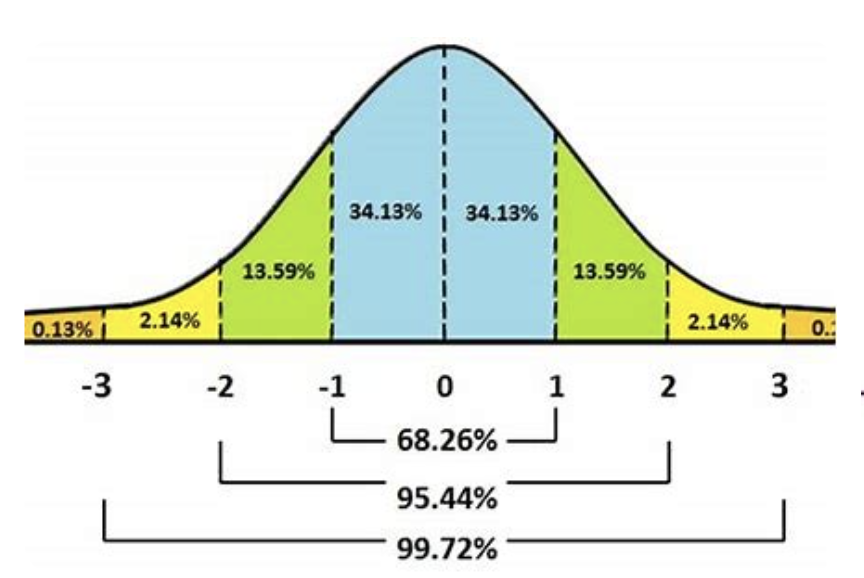

In [41]:
import numpy as np
import pandas as pd

import random

def makedata():
  mean=10000
  std=25

  # this code creates random data.  It adds invalid and missing values to give us data to work with.

  cols = [("name", str), ("education", str),
     ("age", np.int8), ("city",str), ("id", np.int8), ("email", str), ("salary", np.int8),
        ("citizen", ["Y", "N"])]

  words = [np.NaN, "", "abc", "def", "ghi", "jkl", "mno", "pqr"]

  records = []

  for i in range(20):

    data = {}

    for c in cols:

      if c[1] == np.int8:
        if random.randint(0,5)==5:
            data[c[0]] = np.NaN
        else:
            data[c[0]] = abs(int(random.gauss(mean, std)))

      if c[0] == "citizen":
        if random.randint(0,5)==5:
            data[c[0]] = random.randint(0,10)
        else:
            data[c[0]] =c[1][random.randint(0,1)]

      if c[1] == str and c[0] != "citizen":
        data[c[0]] = words[random.randint(0,len(words)-1)]

      if (c[0] == "salary") & (random.randint(0,5)==0):
            data[c[0]] = 1000000

      if (c[0] == "age"):
          data[c[0]] = random.randint(20,25)

    records.append(data)

  df=pd.DataFrame(records)

  return df

df = makedata()
df


,name,education,age,city,id,email,salary,citizen
0,abc,def,24,mno,10006.0,NaN,NaN,N
1,pqr,def,21,,9988.0,abc,9960.0,N
2,NaN,mno,20,pqr,9989.0,mno,10001.0,5
3,jkl,pqr,24,abc,9995.0,mno,NaN,Y
4,,NaN,23,mno,10030.0,ghi,9997.0,N
5,mno,ghi,24,abc,9995.0,jkl,NaN,7
6,def,ghi,21,,9977.0,def,10007.0,N
7,NaN,abc,24,pqr,10004.0,,10026.0,N
8,abc,mno,24,,10017.0,abc,NaN,N
9,NaN,def,21,,9968.0,mno,10014.0,N


In [42]:
df['salary'].describe()

count         15.000000
mean       76013.266667
std       255613.231719
min         9960.000000
25%        10004.000000
50%        10018.000000
75%        10032.500000
max      1000000.000000
Name: salary, dtype: float64

In [43]:
df['salary'].mean()

76013.26666666666

In [44]:
df['salary']

0           NaN
1        9960.0
2       10001.0
3           NaN
4        9997.0
5           NaN
6       10007.0
7       10026.0
8           NaN
9       10014.0
10      10053.0
11    1000000.0
12      10039.0
13      10014.0
14      10042.0
15       9992.0
16          NaN
17      10018.0
18      10018.0
19      10018.0
Name: salary, dtype: float64

In [45]:
# drop outliers, too many standard deviations away
# if the income - mean > 2 std the replace then drop the row
# remeber to use inplace=True


mean = df['salary'].mean()
std = df['salary'].std()

# Define threshold for outliers (e.g., values more than 2 standard deviations away from the mean)
threshold = 2

# calculate
# find with .loc
# drop
# inplace=True


df.drop(df.loc[abs(df['salary'] - mean) > 2 * std].index, inplace=True)

df



,name,education,age,city,id,email,salary,citizen
0,abc,def,24,mno,10006.0,NaN,NaN,N
1,pqr,def,21,,9988.0,abc,9960.0,N
2,NaN,mno,20,pqr,9989.0,mno,10001.0,5
3,jkl,pqr,24,abc,9995.0,mno,NaN,Y
4,,NaN,23,mno,10030.0,ghi,9997.0,N
5,mno,ghi,24,abc,9995.0,jkl,NaN,7
6,def,ghi,21,,9977.0,def,10007.0,N
7,NaN,abc,24,pqr,10004.0,,10026.0,N
8,abc,mno,24,,10017.0,abc,NaN,N
9,NaN,def,21,,9968.0,mno,10014.0,N


In [46]:
abs(1000000 - mean) > 2 * std

True

In [47]:
mean

76013.26666666666

In [48]:
std

255613.23171890175

In [49]:
sMean=df['salary'].mean()

df['salary'] = df['salary'].fillna(sMean)

df

,name,education,age,city,id,email,salary,citizen
0,abc,def,24,mno,10006.0,NaN,10014.214286,N
1,pqr,def,21,,9988.0,abc,9960.000000,N
2,NaN,mno,20,pqr,9989.0,mno,10001.000000,5
3,jkl,pqr,24,abc,9995.0,mno,10014.214286,Y
4,,NaN,23,mno,10030.0,ghi,9997.000000,N
5,mno,ghi,24,abc,9995.0,jkl,10014.214286,7
6,def,ghi,21,,9977.0,def,10007.000000,N
7,NaN,abc,24,pqr,10004.0,,10026.000000,N
8,abc,mno,24,,10017.0,abc,10014.214286,N
9,NaN,def,21,,9968.0,mno,10014.000000,N


**1. Interquartile Range (IQR) Method**:
- Calculate the IQR, which is the difference between the third quartile (Q3) and the first quartile (Q1).
- Define outliers as data points that are below Q1 - 1.5 × IQR or above Q3 + 1.5 × IQR.
- This method is robust to outliers and is commonly used for skewed distributions.


In [76]:
df = makedata()
df.dropna(subset=['salary'],inplace=True)
df

,name,education,age,city,id,email,salary,citizen
0,,NaN,25,def,10014.0,ghi,10017.0,Y
2,NaN,,22,def,NaN,abc,10024.0,Y
3,mno,abc,22,abc,10018.0,mno,9994.0,Y
4,,jkl,21,ghi,10029.0,NaN,9985.0,N
5,ghi,ghi,20,abc,10022.0,def,9980.0,Y
6,mno,ghi,20,jkl,10002.0,pqr,9997.0,Y
7,jkl,NaN,25,def,9983.0,ghi,10027.0,8
8,pqr,,23,pqr,10016.0,NaN,9987.0,10
9,def,pqr,25,def,10000.0,jkl,9959.0,2
10,NaN,ghi,22,NaN,10026.0,mno,1000000.0,N


In [78]:
np.quantile(df['salary'].to_numpy(),[0.25,0])

array([9980., 9942.])

In [79]:
df['salary'].describe()

count         17.000000
mean      126466.294118
std       328786.143702
min         9942.000000
25%         9980.000000
50%         9997.000000
75%        10027.000000
max      1000000.000000
Name: salary, dtype: float64

In [81]:
q1=df['salary'].describe()['25%']
q3=df['salary'].describe()['75%']

print("q1=%i q3=%i" % (q1, q3))

q1=9980 q3=10027


In [82]:
iqr = q3 - q1

df.loc[(df['salary'] < (q1 - (1.5 * iqr))) |  (df['salary']  > (q3 - (1.5 * iqr)))]


,name,education,age,city,id,email,salary,citizen
0,,NaN,25,def,10014.0,ghi,10017.0,Y
2,NaN,,22,def,NaN,abc,10024.0,Y
3,mno,abc,22,abc,10018.0,mno,9994.0,Y
4,,jkl,21,ghi,10029.0,NaN,9985.0,N
5,ghi,ghi,20,abc,10022.0,def,9980.0,Y
6,mno,ghi,20,jkl,10002.0,pqr,9997.0,Y
7,jkl,NaN,25,def,9983.0,ghi,10027.0,8
8,pqr,,23,pqr,10016.0,NaN,9987.0,10
9,def,pqr,25,def,10000.0,jkl,9959.0,2
10,NaN,ghi,22,NaN,10026.0,mno,1000000.0,N


In [62]:
q1 - 1.5 * iqr

9999.25

In [83]:
 iqr

47.0

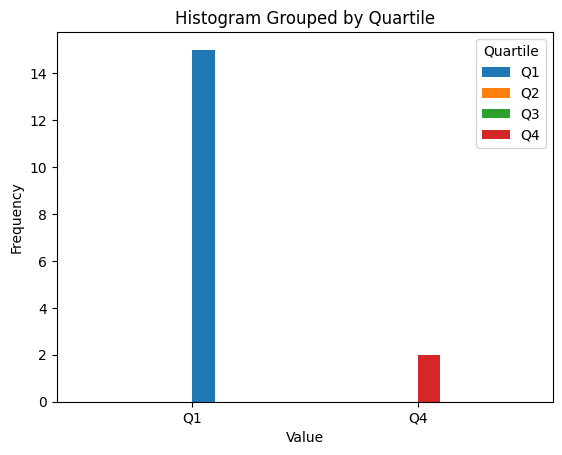

In [86]:
import matplotlib.pyplot as plt


# Cut the data into quartiles
quartiles = pd.cut(df['salary'], bins=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Group the data by quartiles
grouped = quartiles.groupby(quartiles)

# Plot histogram for each quartile
fig, ax = plt.subplots()
for name, group in grouped:
    ax.hist(group, bins=10, label=name)

ax.legend(title='Quartile')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram Grouped by Quartile')
plt.show()

In [95]:
quartiles.value_counts()

salary
Q1    15
Q4     2
Q2     0
Q3     0
Name: count, dtype: int64